<a href="https://colab.research.google.com/github/Kumarkyrohit/google_playstore_app_analysis/blob/main/Google_play_store_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Getting the dataset from githun link
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# A Glimpse of Data

In [ ]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


This dataset is about the applications present on the Google play store application. It can give a in depth analysis about the app's history, ratings, reviews, its growth in term of downlaods.

In [ ]:
df.shape  #there are 13 features for 10841 records

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We can see that there is only one feature that is in float datatype, and others are all object datatype. We need to convert numerical features into int or float datatype.

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Rating column has a lot of null values.

#Data Cleaning

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Let's start with handeling duplicate records and null values

In [ ]:
df.duplicated().sum()

483

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We have removed all the duplicate records from the dataset, and we can see that there are a few records which has null values. These nulls can affect us in many ways like -

If we start removing these from our data, it can lead us to a very small sample space, and if not removed then may result into bais in the analysis.

If we dont take care of these properly, they can affect our statistics like mean, median and even std.

These come with some uncertinities, like in the rating column, we know that removing these may lead to a smaller dataset. We are even uncertain that filling these with mean or median will be a right approach or not.

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

There is this one app that has it's category as '1.9', lets look which one it is.

In [ ]:
df[df['Category'] == '1.9' ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


This app has a lot of uncertain values for features like category, then reviews is also 3.0M, then even size is also '1000+'.

I think it is better to remove this record as it is not of any significance to us in the analysis.

In [ ]:
df.drop(index = 10472, inplace = True)

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In the size column, 'M' is for Mb and 'k' for kb. For similarity, let's bring all values into kb and in numbers only.

In [ ]:
def convert_size(size):
  if 'M' in size:
    return int((float(size.replace('M','')))*1024)  #replaacing M and multiplying with 1024
  elif 'k' in size:
    return int(float(size.replace('k','')))
  elif 'Varies with device' in size:
    return np.nan
  else:
    return np.nan


In [ ]:
df['Size'] = df['Size'].apply(convert_size)

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df['Installs'].value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: Installs, dtype: int64

This 'Installs' column should be in integer format, but because of the presence of characters like '+', ',' it is an object dtype.

In [ ]:
char_to_remove = ['+',',']

for i in char_to_remove:
  df['Installs'] = df['Installs'].str.replace(i, '')
df['Installs'] = df['Installs'].astype('int')


<ipython-input-20-c24c44cae387>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(i, '')


In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Just like Installs column, we can clean Price column also by removing '$' character.

In [ ]:
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype(float)

<ipython-input-22-3c6ce43baabc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


In [ ]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df['Content Rating'].value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [ ]:
df['Genres'].value_counts()

Tools                                842
Entertainment                        588
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

For all these categorical columns, we can convert these into numerical columns, which will be helpful in making models and in machine learning.

For now I'm not changing these to numerical ones as I don't plan to use them for those purposes.

In [ ]:
df['Last Updated1'] = pd.to_datetime(df['Last Updated'])
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,2017-07-25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,2018-07-06
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,2017-01-20
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,2015-01-19


In [ ]:
df['Date'] = df['Last Updated1'].dt.day
df['Month'] = df['Last Updated1'].dt.month
df['Year'] = df['Last Updated1'].dt.year
df.drop(['Last Updated', 'Last Updated1'], axis = 1, inplace = True)

In [ ]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [ ]:
df['Reviews'] = df['Reviews'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Current Ver     10349 non-null  object 
 11  Android Ver     10355 non-null  object 
 12  Date            10357 non-null  int64  
 13  Month           10357 non-null  int64  
 14  Year            10357 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.3+ MB


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Date,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


This is our clean dataset and now we can move on to the next phase.

#Analysis


##Checking all statistics of ratings by app category

In [ ]:
df['Rating'].groupby(by = df['Category']).describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,62.0,4.358065,0.358297,3.2,4.100,4.40,4.700,5.0
AUTO_AND_VEHICLES,73.0,4.190411,0.543692,2.1,4.000,4.30,4.600,4.9
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.30,4.575,4.9
BOOKS_AND_REFERENCE,177.0,4.347458,0.429861,2.7,4.100,4.50,4.600,5.0
BUSINESS,270.0,4.102593,0.652214,1.0,3.825,4.25,4.500,5.0
COMICS,58.0,4.155172,0.537758,2.8,3.825,4.40,4.500,5.0
COMMUNICATION,307.0,4.151466,0.438383,1.0,4.000,4.30,4.400,5.0
DATING,159.0,3.971698,0.621058,1.0,3.700,4.10,4.300,5.0
EDUCATION,129.0,4.375969,0.260341,3.5,4.200,4.40,4.600,4.9


In [ ]:
#Ratings of apps by category

apps_by_category= df['Rating'].groupby(by = df['Category']).mean().sort_values()
apps_by_category

Category
DATING                 3.971698
TOOLS                  4.047411
MAPS_AND_NAVIGATION    4.051613
VIDEO_PLAYERS          4.063750
TRAVEL_AND_LOCAL       4.094146
LIFESTYLE              4.096066
BUSINESS               4.102593
FINANCE                4.127445
NEWS_AND_MAGAZINES     4.128505
ENTERTAINMENT          4.136036
COMMUNICATION          4.151466
COMICS                 4.155172
FOOD_AND_DRINK         4.164151
HOUSE_AND_HOME         4.164706
LIBRARIES_AND_DEMO     4.178462
MEDICAL                4.182450
PHOTOGRAPHY            4.182895
AUTO_AND_VEHICLES      4.190411
FAMILY                 4.191153
PRODUCTIVITY           4.201796
SPORTS                 4.225175
WEATHER                4.244000
SHOPPING               4.251485
SOCIAL                 4.254918
HEALTH_AND_FITNESS     4.261450
BEAUTY                 4.278571
GAME                   4.281285
PARENTING              4.300000
PERSONALIZATION        4.333871
BOOKS_AND_REFERENCE    4.347458
ART_AND_DESIGN         4.358065

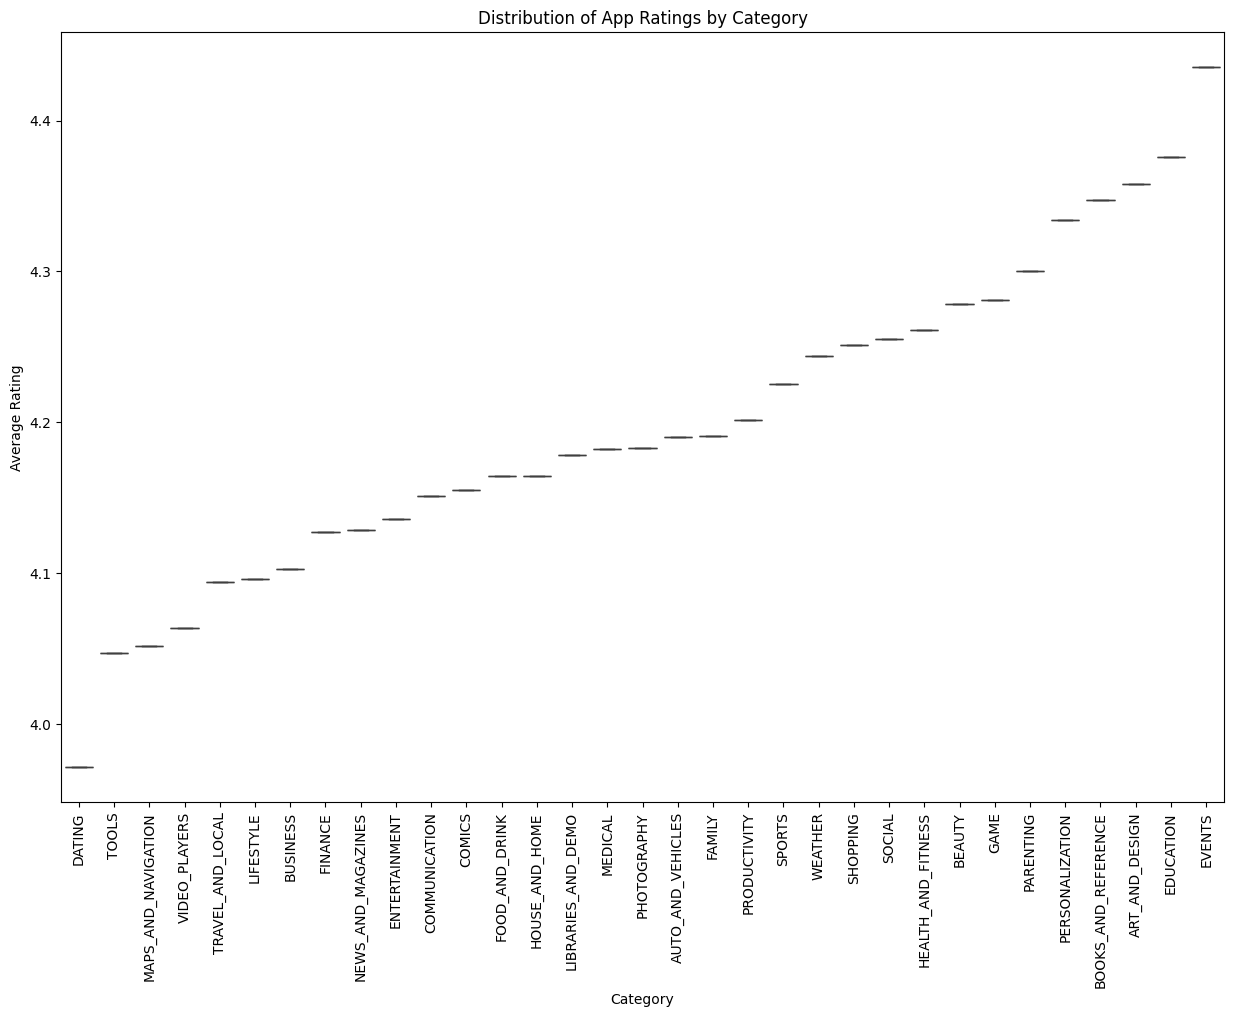

In [ ]:
#Avg app ratings by category plot
plt.figure(figsize = (15,10))
sns.boxplot(x = apps_by_category.index, y = apps_by_category.values)
plt.title('Distribution of App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation = 90)
plt.show()

We can see that apps in the categories like Events, education are performing the best as per the ratings. And then there are apps in categories that are performing good if not better.

##Looking for any pattern between App Size and Ratings

In [ ]:
df['Size'].describe()

count      8831.000000
mean      21798.151625
std       23081.680805
min           8.000000
25%        4812.000000
50%       13312.000000
75%       29696.000000
max      102400.000000
Name: Size, dtype: float64

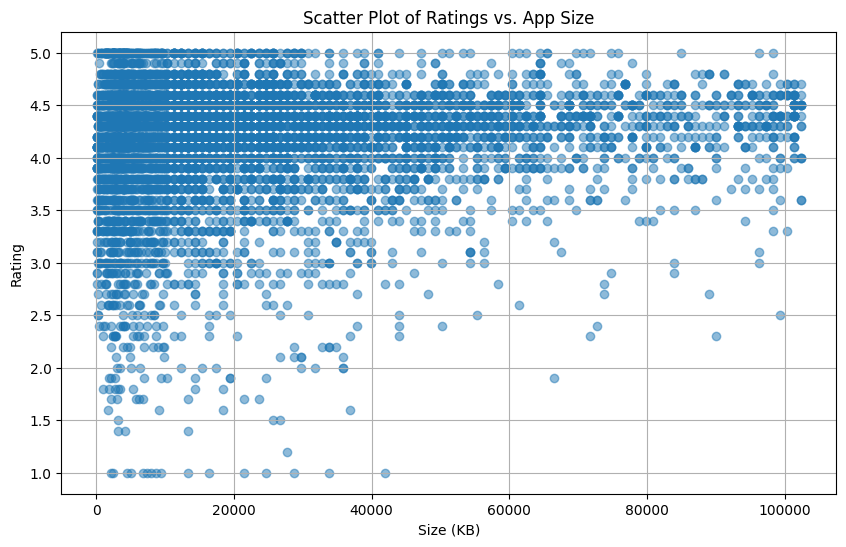

In [ ]:
#Scatter Plot of Ratings vs. App Size
plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['Rating'], alpha=0.5)
plt.title('Scatter Plot of Ratings vs. App Size')
plt.xlabel('Size (KB)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

There is this relation that the more the size of the app the less no. of people are using that particular app. This is evedent as there are more points on the left side in the plot where the size is less than ariund 20 MB.

And about the relationship between ratings on the basis of app size, we can say for sure that one will rarely find a big app with very low ratings.

#App type with price


In [ ]:

df['Price'].groupby(df['Category']).describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,65.0,0.091846,0.420788,0.0,0.0,0.0,0.0,1.99
AUTO_AND_VEHICLES,85.0,0.158471,1.111872,0.0,0.0,0.0,0.0,9.99
BEAUTY,53.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
BOOKS_AND_REFERENCE,230.0,0.520739,1.563944,0.0,0.0,0.0,0.0,6.49
BUSINESS,427.0,0.410515,4.622407,0.0,0.0,0.0,0.0,89.99
COMICS,60.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
COMMUNICATION,366.0,0.227158,1.262382,0.0,0.0,0.0,0.0,19.99
DATING,196.0,0.160357,0.924262,0.0,0.0,0.0,0.0,7.99
EDUCATION,130.0,0.138154,0.793184,0.0,0.0,0.0,0.0,5.99


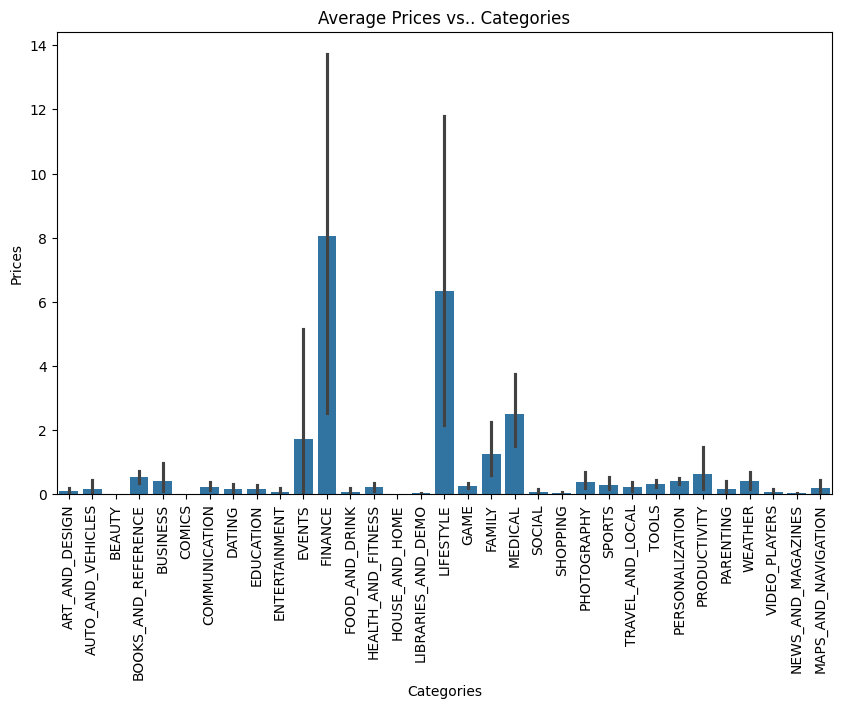

In [ ]:
#App prices for different Categories
plt.figure(figsize = (10,6))
sns.barplot(x = 'Category', y = 'Price', data = df)
plt.title('Average Prices vs.. Categories')
plt.xlabel('Categories')
plt.ylabel('Prices')
plt.xticks(rotation = 90)
plt.show()

We can see these 2-3 big buildings, telling us that these are the Apps that chargese the most. And it even make sense that premium versions of apps in Finance and Lifestyle do cost us a much.

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Date,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.0,100,Free,0.0,Everyone,Education,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,19,1,2015


#Checking the most popular apps in the dataset


In [ ]:
df[['App', 'Installs']].sort_values(by = 'Installs', ascending = False).head(10)

,App,Installs
341,Hangouts,1000000000
3928,YouTube,1000000000
451,Gmail,1000000000
3996,Google Chrome: Fast & Secure,1000000000
1700,Subway Surfers,1000000000
3454,Google Drive,1000000000
2808,Google Photos,1000000000
865,Google Play Games,1000000000
2853,Google Photos,1000000000
411,Google Chrome: Fast & Secure,1000000000


#Identifying the most popular app category


In [ ]:

result = df.groupby('Category').agg({'Installs': 'sum', 'App': 'count'})
result['Average_installs_per_category'] = (result['Installs']/result['App']).round(2)
result.sort_values(by = 'Average_installs_per_category',ascending = False).head(10)


,Installs,App,Average_installs_per_category
Category,,,
COMMUNICATION,24152276251,366,65989825.82
SOCIAL,12513867902,280,44692385.36
VIDEO_PLAYERS,6222002720,175,35554301.26
PRODUCTIVITY,12463091369,407,30621846.12
PHOTOGRAPHY,9721247655,322,30190210.11
GAME,31544024415,1121,28139183.24
TRAVEL_AND_LOCAL,6361887146,237,26843405.68
ENTERTAINMENT,2455660000,111,22123063.06
NEWS_AND_MAGAZINES,5393217760,264,20428855.15


These are the top 10 categoriees which are most preffered by people, I'm also showing average number of installs per category along with total installs for that particular category.

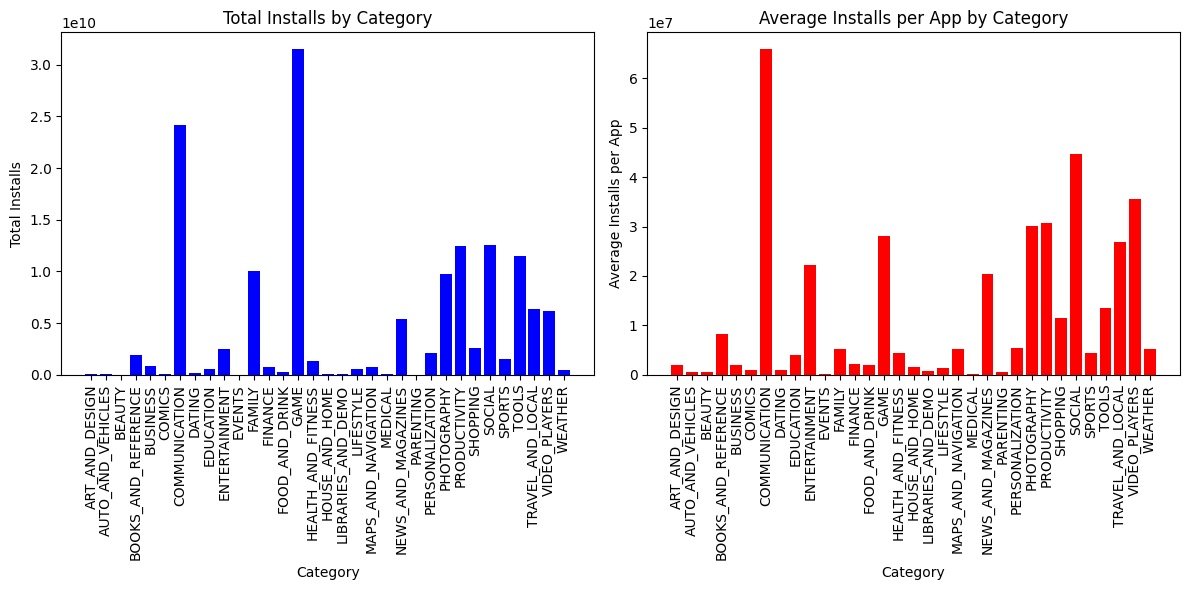

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for total installs
ax1.bar(result.index, result['Installs'], color='blue')
ax1.set_title('Total Installs by Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Installs')
ax1.tick_params(axis='x', rotation=90)

# Bar plot for average installs per app
ax2.bar(result.index, result['Average_installs_per_category'], color='red')
ax2.set_title('Average Installs per App by Category')
ax2.set_xlabel('Category')
ax2.set_ylabel('Average Installs per App')
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Now, from both the plots we can se which categories are the most popular ones.

If we had considered only the total installs as the factor then 'Games' would have been the most famous one but right in the next plot we can see on an average they were less installed than 'Communication' category.

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Date,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.0,100,Free,0.0,Everyone,Education,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,19,1,2015


#Identifying the most successful app on google play store


In [ ]:

df['Success Metric'] = df['Installs'] * df['Rating'] * df['Reviews']
top_10_apps = df.sort_values(by='Success Metric', ascending=False, ).head(10)
print(top_10_apps[['App', 'Installs', 'Rating', 'Reviews', 'Success Metric']])


                                           App    Installs  Rating   Reviews  \
2544                                  Facebook  1000000000     4.1  78158306   
3943                                  Facebook  1000000000     4.1  78128208   
336                         WhatsApp Messenger  1000000000     4.4  69119316   
3904                        WhatsApp Messenger  1000000000     4.4  69109672   
2604                                 Instagram  1000000000     4.5  66577446   
2545                                 Instagram  1000000000     4.5  66577313   
3909                                 Instagram  1000000000     4.5  66509917   
382   Messenger – Text and Video Chat for Free  1000000000     4.0  56646578   
335   Messenger – Text and Video Chat for Free  1000000000     4.0  56642847   
1872                            Subway Surfers  1000000000     4.5  27725352   

      Success Metric  
2544    3.204491e+17  
3943    3.203257e+17  
336     3.041250e+17  
3904    3.040826e+17  
2604

As we don't have any information related to developers in this dataset, we can't find the most successful ones.
Instead of that, I'm finding the most successful app, for which I created a success matric assuming all the given matrics like number of installs, Rating, and reviews are weighted equal in the dataset.


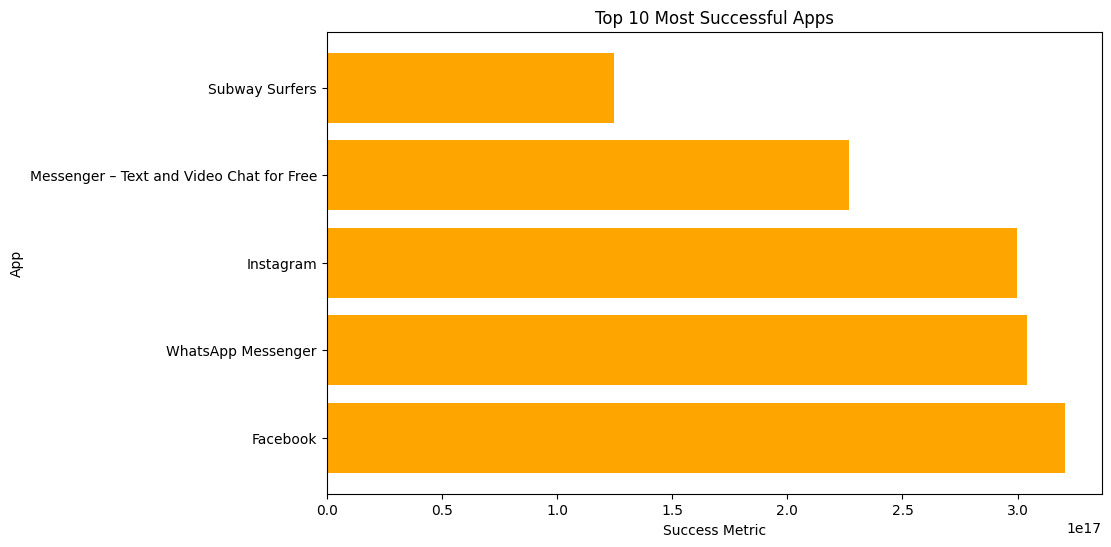

In [ ]:
plt.figure(figsize = (10,6))
plt.barh(top_10_apps['App'], top_10_apps['Success Metric'], color= 'orange')
plt.xlabel('Success Metric')
plt.ylabel('App')
plt.title('Top 10 Most Successful Apps')
plt.show()

We can see as per our success matrics, Facebook is the most successful app followed by Whatsapp, instagram and other social media apps.

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Date,Month,Year,Success Metric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018,6.519000e+06
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018,1.885650e+09
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018,2.056485e+12
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018,4.851990e+13
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018,4.158100e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,25,7,2017,8.550000e+05
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.0,100,Free,0.0,Everyone,Education,1.0,4.1 and up,6,7,2018,2.000000e+03
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,20,1,2017,NaN
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,19,1,2015,5.130000e+05


The date columns in the dataset are the dates when these apps are last modified. And using this feature, it is very difficult to find which is the best time to launch a new app in the dataset.

###Throughout this notebook, I went through the whole process of analyzing data from very scratch. I started with importing data from a github link. Then exploring the data for unclean or dirty data. And I found a lot of issues which were cleaned in the next phase of the Data Cleaning phase.

###Next, I moved on to analyzing a few features with respect to other features and found many key insights which can be put to use by people in the app development industry or the app owner companies.